# UNUSED CODE

##

## API full set of data with:
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score
- PLAYERS

In [2]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="500",
                            
                            #retrive tables
                            tables = "ScoreboardGames=SG, ScoreboardPlayers=SP,Tournaments=T, Leagues=L",
                            
                            #retrive fields as columns
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SP.Link,\
                                    SG.DateTime_UTC, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score", 
                            
                            #set condition (only include specified leagues)
                            where = 'L.League_Short = "'+league+'"',
                            
                            #similar to vlookup in the web pages
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League, SP.MatchId=SG.MatchId")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break
        

  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt



## Import df_Scoreboard

In [ ]:
import pandas as pd
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])
df_Scoreboard = df_Scoreboard.drop("DateTime UTC__precision", axis=1)
df_Scoreboard.sort_values("DateTime UTC")
df_Scoreboard.head()
#df_Scoreboard.to_csv("Scoreboard.csv")

## API LCK set of data with PLAYERS team, ID, age, nationality, birthday

In [ ]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
#leagues=['LCS','LEC','LCK','LPL','CBLOL','LJL','LLA','PCS','VCS']
leagues=['LCK']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            #retrive tables
                            tables = "Teams=T, Players=P",
                            
                            #retrive fields as columns
                            fields="P.Team=Team, P.ID=ID, P.Nationality, P.Country,P.Birthdate,\
                                    T.Region=Region, T.Short", 
                            
                            #set condition 
                            #where = 'T.Name = P.Team',
                            
                            #similar to vlookup in the web pages
                            join_on = "T.Name = P.Team")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break

        
        
import pandas as pd
df_Players = pd.DataFrame([ a['title'] for a in results ])

#drop birthdate precision
df_Players = df_Players.drop("Birthdate__precision", axis=1)

df_Players.head()
#df_Players.to_csv("Players.csv")

In [ ]:
df_stats = df_Scoreboard.merge(df_Players, left_on = 'Team1', right_on = 'Team', how = 'left')
df_stats.head()
df_stats.to_csv("Merged.csv")

In [ ]:
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################

# 

# USED CODE

## 

# API full set of Scoreboard data with: 
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score

In [44]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
    
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League")
    
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/21 [00:00<?, ?it/s]

## Convert to Panda DataFrame and Clean Data

In [45]:
#import pandas package
import pandas as pd

#convert to dataframe from dictionary
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])

#drop unused column
df_Scoreboard = df_Scoreboard.drop("Date__precision", axis=1)

#sort by date
df_Scoreboard.sort_values(by = "Date",inplace=True)

#split date and time
df_Scoreboard["Date"] = pd.to_datetime(df_Scoreboard["Date"])
df_Scoreboard["Year"]= df_Scoreboard["Date"].dt.year

#convert Team 1 & 2 score as integers
df_Scoreboard = df_Scoreboard.astype({'Team1Score':'int','Team2Score':'int'})

#no index
df_Scoreboard = df_Scoreboard.reset_index(drop=True)

#preview first few rows
df_Scoreboard.head()

#save as csv
df_Scoreboard.to_csv("Scoreboard.csv", index=False)

## Shortcut - Import df_Scoreboard

In [105]:
import pandas as pd
df_Scoreboard = pd.read_csv("Scoreboard.csv")
df_Scoreboard.head()

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Year
0,Worlds Season 1,WCS,18/06/2011 08:30,45:09:00,against All authority,Epik Gamer,0,1,Epik Gamer,2011
1,Worlds Season 1,WCS,18/06/2011 08:30,45:09:00,against All authority,Epik Gamer,0,1,Epik Gamer,2011
2,Worlds Season 1,WCS,18/06/2011 09:45,29:38:00,Fnatic,Team Pacific,1,0,Fnatic,2011
3,Worlds Season 1,WCS,18/06/2011 09:45,29:38:00,Fnatic,Team Pacific,1,0,Fnatic,2011
4,Worlds Season 1,WCS,18/06/2011 11:00,41:18:00,against All authority,Fnatic,1,0,against All authority,2011


# 

# Get All Teams Region data
## API full set of data with: (much faster)
- TEAM: Name, Region, Abbreviation 

In [46]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:

        response = site.api("cargoquery",
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "Teams=T",
                            
                            fields="T.Name=Team, T.Region=Region, T.Short=Team_abbr")
                            
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/21 [00:00<?, ?it/s]

## Convert to Panda DataFrame and Clean Data

In [47]:
import pandas as pd
df_TeamRegion = pd.DataFrame([ a['title'] for a in results ])

#clean data - remove NaN's and duplicates
df_TeamRegion = df_TeamRegion.dropna()
df_TeamRegion = df_TeamRegion.drop_duplicates(subset="Team")

#no index
df_TeamRegion = df_TeamRegion.reset_index(drop=True)

#preview first few rows
df_TeamRegion.head()

#save as csv
df_TeamRegion.to_csv("TeamRegion.csv", index=False)

## Shortcut - Import df_TeamRegion

In [31]:
import pandas as pd
df_TeamRegion = pd.read_csv("TeamRegion.csv",index_col=0)
df_TeamRegion.head()

,Team,Region,Team_abbr
0,00 Nation,Europe,00N
1,00 Prospects,Europe,00P
2,1 Trick Ponies,North America,1TP
3,1. Berliner Esport-Club e.V.,Europe,BESC
4,100 Thieves,North America,100


## Add DAMWON Gaming and DWG KIA to df_Team_Region
 - Wolrds Winners 2020 and 2021

In [48]:
#DAMWON Gaming and DWG KIA both renamed - They are the same team...
#create new rows for DAMWON Gaming and DWG KIA
df_TeamRegion2 = {"Team":"DAMWON Gaming",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

df_TeamRegion3 = {"Team":"DWG KIA",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

#add new rows to df
df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)
df_TeamRegion.head()

#re-save as csv
df_TeamRegion.to_csv("TeamRegion.csv", index=False)

C:\Users\vivia\AppData\Local\Temp\ipykernel_7068\1473232610.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
C:\Users\vivia\AppData\Local\Temp\ipykernel_7068\1473232610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)


In [49]:
#create a dictionary to match teams to regions
#some of them have merged and changed so they should be analyzed together
dict_regions_code = {
    'Africa':'EMEA',
    'Brazil':'BR',
    'China':'CN',
    'CIS':'INT',
    'EMEA':'EMEA',
    'Europe':'EMEA',
    'International':'INT',
    'Japan':'JP',
    'Korea':'KR',
    'LAN':'INT',
    'LAS':'INT',
    'Latin America':'LAT',
    'LMS':'INT',
    'MENA':'INT',
    'North America':'NA',
    'Oceania':'PCS',
    'PCS':'PCS',
    'SEA':'PCS',
    'Turkey':'EMEA',
    'Vietnam':'VN'
}

#define function to get region code from dictionary
def get_region_code(region):
    return dict_regions_code[region]

## Matching old to new team names 
- only the ones that cannot be found in df above
- some old team names may still not be matched to new ones unfortunately

In [50]:
#import manually stored file for matching old to new team names
df_OldtoNewTeams = pd.read_csv("OldtoNewTeams.csv")

#concatenate the two dataframes to add the new list of teams
df_TeamRegion = pd.concat([df_TeamRegion,df_OldtoNewTeams])
df_TeamRegion.to_csv("TeamRegion.csv",index=False)

## Merge team region with region codes

In [51]:
import pandas as pd
#import manually saved csv with Region and code - not accessible on Leaguepedia
df_Region_code = pd.read_csv("Region_Code.csv",na_filter = False) #interprets NA as string instead of NaN value

#merge with region_code
df_TeamRegion_code = df_TeamRegion.merge(df_Region_code, on = 'Region', how = 'left')
df_TeamRegion_code.head()

#save as csv
df_TeamRegion_code.to_csv("TeamRegion.csv",index=False)

## Merge tables to get:
- Team1, Team2, WinTeam Regions
- blue/red side

In [32]:
# Add Region and Region Code to Scoreboard

In [52]:
#first merge for Team 1
df_team1 = df_Scoreboard.merge(df_TeamRegion_code, left_on = 'Team1', right_on = 'Team', how = 'left')
df_team1.head()

#then merge for Team 2
df_team1and2 = df_team1.merge(df_TeamRegion_code, left_on = 'Team2', right_on = 'Team', how = 'left')

#then merge for WinTeam
df_team1and2_andwinner = df_team1and2.merge(df_TeamRegion_code, left_on = 'WinTeam', right_on = 'Team', how = 'left')

#clean dataframe
df_team1and2_andwinner.drop(columns=["Team_x","Team_y","Team"], inplace = True)
df_team1and2_andwinner.rename(columns={'Region_x':'Region_T1','Team_abbr_x':'Team_T1','Region_code_x':'Region_code_T1','Region_y':'Region_T2','Team_abbr_y':'Team_T2','Region_code_y':'Region_code_T2','Region':'Region_Win','Team_abbr':'Team_Win','Region_code':'Region_code_Win'},inplace=True)

df_team1and2_andwinner.head()

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Year,Region_T1,Team_T1,Region_code_T1,Region_T2,Team_T2,Region_code_T2,Region_Win,Team_Win,Region_code_Win
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,2011,Europe,aAa,EMEA,North America,EPIK,NA,North America,EPIK,NA
1,Worlds Season 1,WCS,2011-06-18 09:45:00,29:38,Fnatic,Team Pacific,1,0,Fnatic,2011,EMEA,FNC,EMEA,SEA,PCFC,PCS,EMEA,FNC,EMEA
2,Worlds Season 1,WCS,2011-06-18 11:00:00,41:18,against All authority,Fnatic,1,0,against All authority,2011,Europe,aAa,EMEA,EMEA,FNC,EMEA,Europe,aAa,EMEA
3,Worlds Season 1,WCS,2011-06-18 11:00:00,28:55,Epik Gamer,Team Pacific,1,0,Epik Gamer,2011,North America,EPIK,NA,SEA,PCFC,PCS,North America,EPIK,NA
4,Worlds Season 1,WCS,2011-06-18 12:15:00,24:13,against All authority,Team Pacific,1,0,against All authority,2011,Europe,aAa,EMEA,SEA,PCFC,PCS,Europe,aAa,EMEA


In [53]:
#import manually saved csv with Region and code - not accessible on Leaguepedia
df_Region_code = pd.read_csv("Region_Code.csv",na_filter = False) #interprets NA as string instead of NaN value

#first merge team1
df_team1_code = df_team1and2_andwinner.merge(df_Region_code, left_on = 'Region_T1', right_on = 'Region', how = 'left')
df_team1_code.drop(columns="Region",inplace=True)

#then merge team2
df_team1and2_code = df_team1_code.merge(df_Region_code, left_on = 'Region_T2', right_on = 'Region', how = 'left')
df_team1and2_code.drop(columns="Region",inplace=True)

#then merge WinTeam
df_team1and2_andwinner_code = df_team1and2_code.merge(df_Region_code, left_on = 'Region_Win', right_on = 'Region', how = 'left')
df_team1and2_andwinner_code.drop(columns="Region",inplace=True)

#clean dataframe
df_team1and2_andwinner_code.rename(columns={"Region_code_x":"Region_code_T1","Region_code_y":"Region_code_T2","Region_code":"Region_code_Win"},inplace=True)

df_team1and2_andwinner_code.head()

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Year,...,Region_code_T1,Region_T2,Team_T2,Region_code_T2,Region_Win,Team_Win,Region_code_Win,Region_code_T1,Region_code_T2,Region_code_Win
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,2011,...,EMEA,North America,EPIK,NA,North America,EPIK,NA,EMEA,NA,NA
1,Worlds Season 1,WCS,2011-06-18 09:45:00,29:38,Fnatic,Team Pacific,1,0,Fnatic,2011,...,EMEA,SEA,PCFC,PCS,EMEA,FNC,EMEA,EMEA,PCS,EMEA
2,Worlds Season 1,WCS,2011-06-18 11:00:00,41:18,against All authority,Fnatic,1,0,against All authority,2011,...,EMEA,EMEA,FNC,EMEA,Europe,aAa,EMEA,EMEA,EMEA,EMEA
3,Worlds Season 1,WCS,2011-06-18 11:00:00,28:55,Epik Gamer,Team Pacific,1,0,Epik Gamer,2011,...,NA,SEA,PCFC,PCS,North America,EPIK,NA,NA,PCS,NA
4,Worlds Season 1,WCS,2011-06-18 12:15:00,24:13,against All authority,Team Pacific,1,0,against All authority,2011,...,EMEA,SEA,PCFC,PCS,Europe,aAa,EMEA,EMEA,PCS,EMEA


In [57]:
# Add Blue/Red Side to Scoreboard

In [54]:
#get if blue side or red side is winner
for lab, row in df_team1and2_andwinner_code.iterrows():
    if row["Team1"] == row["WinTeam"]:
        df_team1and2_andwinner_code.loc[lab,"Blue/Red"] = "Blue"
    else:
        df_team1and2_andwinner_code.loc[lab,"Blue/Red"] = "Red"
    
df_team1and2_andwinner_code.head()

#save to Scoreboard.csv and df_Scoreboard
df_team1and2_andwinner_code.to_csv("Scoreboard.csv", index=False)
df_Scoreboard = pd.read_csv("Scoreboard.csv")
df_Scoreboard[["Region_code_T1", "Region_code_T2","Region_code_Win"]] = df_Scoreboard[["Region_code_T1", "Region_code_T2","Region_code_Win"]].fillna("NA")
df_Scoreboard.to_csv("Scoreboard.csv", index=False)

#table form - get blue/red count
df_Scoreboard.groupby(["Blue/Red"])["Blue/Red"].count()

Blue/Red
Blue    17308
Red     14815
Name: Blue/Red, dtype: int64

#

# Worlds Winners 2011 - 2022

## Get Worlds Tournament only - original dataset contains regional finals

In [55]:
#I want to get the winners of all the Worlds Championships only
#I can't filter from 'WCS' league because it randomly includes regional finals
#But the tournaments that begin with "Worlds" can be identified
df_Scoreboard_Worlds = df_Scoreboard[df_Scoreboard["Tournament"].str.startswith("Worlds")]
df_Scoreboard_Worlds = df_Scoreboard_Worlds.reset_index(drop=True)
df_Scoreboard_Worlds = df_Scoreboard_Worlds.drop_duplicates(keep="first")
df_Scoreboard_Worlds.head
df_Scoreboard_Worlds.to_csv("Scoreboard_Worlds.csv", index=False)

## Graph - Top 10 Team Winners in ALL matches of Worlds

<AxesSubplot: title={'center': 'Top 10 Teams'}, xlabel='Teams', ylabel='Matches won'>

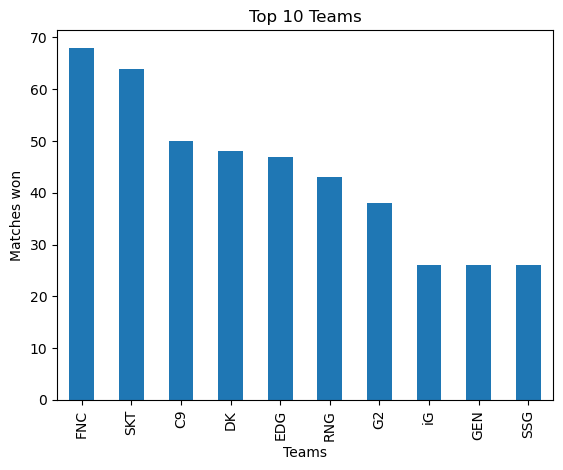

In [56]:
#who won the most matches in Worlds Championship
import seaborn as sns

top_10_teams = (df_Scoreboard_Worlds['Team_Win'].value_counts()).iloc[:10]

#create bar chart of top 10 teams
top_10_teams.plot(kind='bar',title='Top 10 Teams', xlabel = "Teams", ylabel = "Matches won")

## Graph - Top 10 Region Winners in ALL matches of Worlds

<AxesSubplot: title={'center': 'Top 10 Regions'}, xlabel='Regions', ylabel='Matches won'>

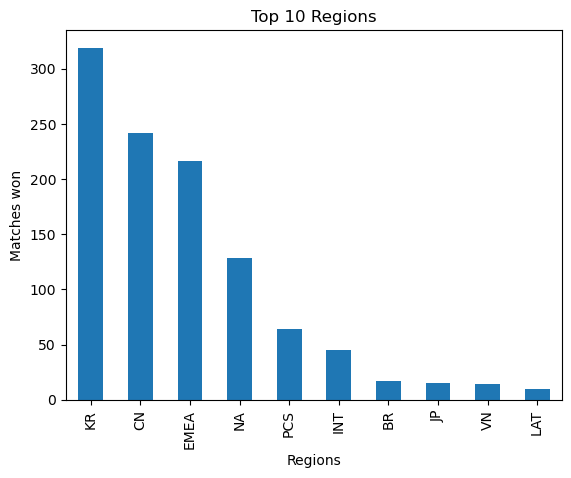

In [57]:
#who won the most matches in Worlds Championship
import seaborn as sns

top_10_regions = (df_Scoreboard_Worlds['Region_code_Win'].value_counts()).iloc[:10]

#create bar chart of top 10 teams
top_10_regions.plot(kind='bar',title='Top 10 Regions', xlabel = "Regions", ylabel = "Matches won")

## Get list of all World Winners - filter who won most matches in Finals

In [58]:
#create function to get winner of each season/worlds 
def get_winner(year):
    finals_year = df_Scoreboard_Worlds[df_Scoreboard_Worlds["Year"]==year]
    winner = finals_year["WinTeam"].value_counts( ).idxmax()
    return winner

#create dictionary for Worlds Winners
years = [i for i in range(2011,2023)]

winners = []
for i in range(2011,2023):
    winners.append(get_winner(i))

dict_worlds_winners = {}
for i in range(len(years)):
    dict_worlds_winners[years[i]] = winners[i]

In [59]:
#create dataframe from dictionary
df_worlds_winners = pd.DataFrame(data = [dict_worlds_winners])
df_worlds_winners = df_worlds_winners.transpose()
df_worlds_winners.reset_index(inplace=True)
df_worlds_winners.columns = ["Year","Winner"]
df_worlds_winners.to_csv("Worlds_Winners.csv",index=False) 

#merge with TeamRegion to get Region_code
df_worlds_winners = df_worlds_winners.merge(df_TeamRegion_code, left_on = "Winner", right_on = "Team", how = "left")
df_worlds_winners = df_worlds_winners.drop(columns="Team")
df_worlds_winners.head()
#df_worlds_winners.to_csv("Worlds_Winners.csv",index=False)

,Year,Winner,Region,Team_abbr,Region_code
0,2011,Fnatic,EMEA,FNC,EMEA
1,2012,Azubu Frost,Korea,AZF,KR
2,2013,SK Telecom T1,Korea,SKT,KR
3,2014,Samsung White,Korea,SSW,KR
4,2015,SK Telecom T1,Korea,SKT,KR


## Shortcut - Import df_worlds_winners

In [10]:
import pandas as pd
df_worlds_winners = pd.read_csv("Worlds_Winners.csv",index_col=0) 

## Graph - Frequency of Worlds Winner : Teams 

([<matplotlib.axis.YTick at 0x2021c6008b0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

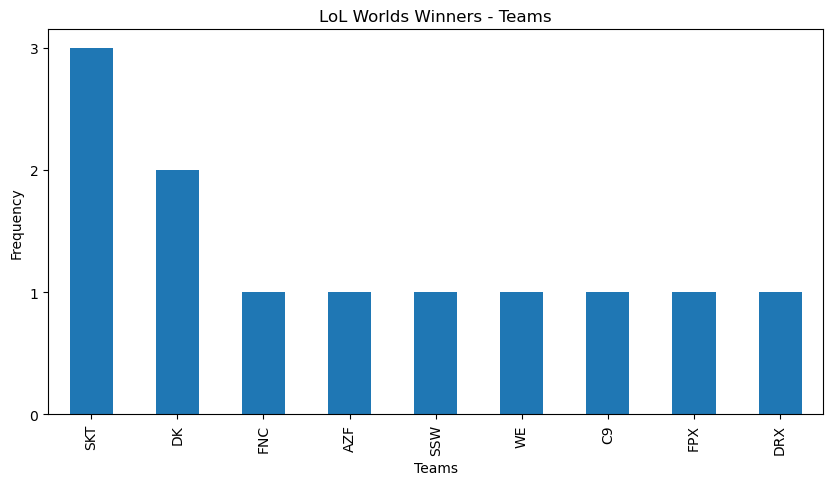

In [60]:
#Plot frequencies of team winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners["Team_abbr"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Teams")
ax.set_xlabel("Teams")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 4, 1))

## Graph - Frequency of Worlds Winner : Regions 

([<matplotlib.axis.YTick at 0x2021c685850>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

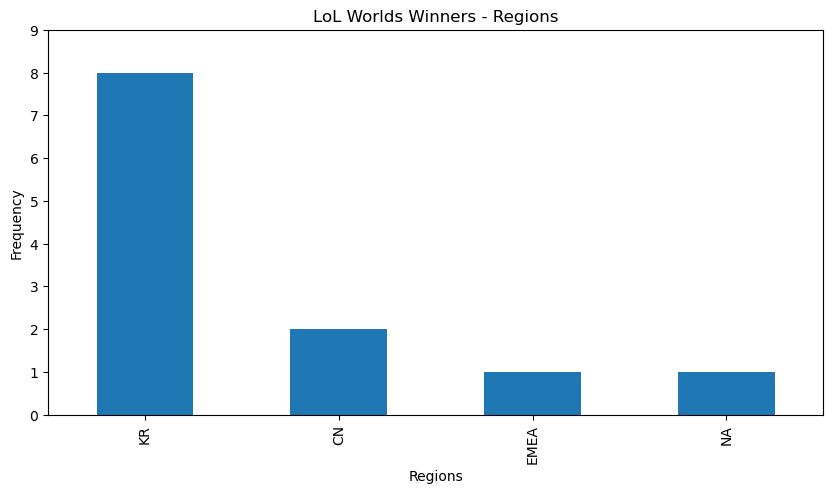

In [61]:
#Plot frequencies of region winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners["Region_code"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Regions")
ax.set_xlabel("Regions")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 10, 1))

# Get Participation of Regions in Worlds
- to show that Korea participated later but won a lot more matches/worlds finals


## Group by years and find out region participation

In [62]:
#concatenate teams 1 and 2 for full partcipation
data1 = df_Scoreboard_Worlds.groupby(["Year","Region_code_T1"])["Region_code_T1"].count()
data2 = df_Scoreboard_Worlds.groupby(["Year","Region_code_T2"])["Region_code_T2"].count()
data = pd.concat([data1,data2],axis=1)
df_participation = pd.DataFrame(data)
df_participation["Region_T1_T2"]=df_participation["Region_code_T1"] + df_participation["Region_code_T2"] 
df_participation= df_participation.reset_index()
df_participation.rename(columns={df_participation.columns[1]:"Region_Participation",df_participation.columns[4]:"Participation_counts"},inplace=True)
df_participation.head()

#groupby years and regions
participation_data = df_participation.groupby(["Year","Region_Participation"])["Participation_counts"].sum()
participation_data

df_participation_data = pd.DataFrame(participation_data)
df_participation_data

Participation_counts
Year Region_Participation                      
2011 EMEA                                  28.0
     NA                                    22.0
     PCS                                    0.0
2012 CN                                     8.0
     EMEA                                  12.0
...                                         ...
2022 KR                                    72.0
     LAT                                    5.0
     NA                                    28.0
     PCS                                   16.0
     VN                                    15.0

[93 rows x 1 columns]

In [63]:
#compare participation vs wins

#group regions and count wins per region
wins = df_Scoreboard_Worlds.groupby(["Year","Region_code_Win"])["Region_code_Win"].count()

#table for counting wins per region
dfwins = pd.DataFrame(wins)
dfwins.rename(columns={"Region_code_Win":"Win_counts"},inplace=True)
dfwins = dfwins.reset_index()
dfwins.rename(columns={"Region_code_Win":"Region_code"},inplace=True)
dfwins.head()

#table for counting participation per region
dfparticipation = pd.DataFrame(participation_data)
dfparticipation = dfparticipation.reset_index()
dfparticipation.rename(columns={"Region_Participation":"Region_code"},inplace=True)
dfparticipation.head()

#merge tables to compare participation vs win counts
dfcompare_part_wins = dfwins.merge(dfparticipation, on = ["Year","Region_code"], how = "left")
dfcompare_part_wins = dfcompare_part_wins.set_index(["Region_code","Year"])
dfcompare_part_wins.head()

,,Win_counts,Participation_counts
Region_code,Year,,
EMEA,2011,16,28.0
NA,2011,11,22.0
PCS,2011,1,0.0
CN,2012,3,8.0
EMEA,2012,5,12.0


<AxesSubplot: title={'center': 'KR'}, xlabel='Year'>

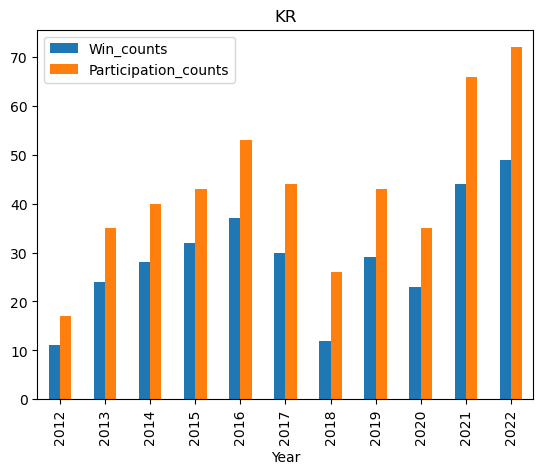

In [86]:
#Graph for participation vs wins
import matplotlib.pyplot as plt

#sample graph for Korea
dfcompare_part_wins_KR = dfcompare_part_wins.loc["KR"]
dfcompare_part_wins_KR.plot(kind="bar", title="KR")

In [67]:
#ratio of participation vs wins
list_regions = list(df_Region_code["Region_code"].unique())
list_regions

#define function for getting wins/participation counts
def get_part_win_ratio(region):
    part_wins_ratio = dfcompare_part_wins.loc[region]["Win_counts"]/dfcompare_part_wins.loc[region]["Participation_counts"]
    return part_wins_ratio.mean()


#make table of region vs ratio
df_ratios = pd.DataFrame()
df_ratios["Regions"]=list_regions
df_ratios["Ratio"] = df_ratios["Regions"].apply(get_part_win_ratio)
    
df_ratios

,Regions,Ratio
0,EMEA,0.465486
1,BR,0.259259
2,CN,0.558659
3,INT,0.343372
4,JP,0.312727
5,KR,0.663383
6,LAT,0.272143
7,NA,0.412855
8,PCS,inf
9,VN,0.292857


In [68]:
#inspect why PCS mean ratio is 'inf'
df_part_wins_ratio_PCS = dfcompare_part_wins.loc["PCS"]["Win_counts"]/dfcompare_part_wins.loc["PCS"]["Participation_counts"]
df_part_wins_ratio_PCS

Year
2011         inf
2012    0.333333
2014    0.428571
2015    0.250000
2016    0.500000
2017    0.315789
2018    0.363636
2019    0.342857
2020    0.400000
2021    0.419355
2022    0.187500
dtype: float64

In [69]:
#remove inf (0/0) from PCS because that's where the inf comes from
import numpy as np
df_part_wins_ratio_PCS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_part_wins_ratio_PCS.dropna(inplace=True)
df_part_wins_ratio_PCS.mean()

#replace PCS mean ratio in table
df_ratios.at[8,"Ratio"] = df_part_wins_ratio_PCS.mean()
df_ratios
#df_ratios.to_csv("Participation_to_Win_Ratio.csv",index=False)

,Regions,Ratio
0,EMEA,0.465486
1,BR,0.259259
2,CN,0.558659
3,INT,0.343372
4,JP,0.312727
5,KR,0.663383
6,LAT,0.272143
7,NA,0.412855
8,PCS,0.354104
9,VN,0.292857


In [ ]:
#can see that KR and CN has participation to win ratio > 50%
#also they have most wins in Worlds
#will also look at EMEA and NA

In [85]:
#dfparticipation_finals_by_region = dfparticipation_finals.reset_index()
#dfparticipation_finals_by_region = dfparticipation_finals_by_region.set_index(["Region_code","Year"])
#dfparticipation_finals_by_region

#dfparticipation_finals = dfparticipation_finals.reset_index()
piv_participation_finals = pd.pivot_table(dfcompare_part_wins, index="Region_code",columns="Year",values="Participation_counts", fill_value=0)
piv_participation_finals

#can see that KR, CN and EMEA has similar number of teams playing in recent 5Y *knockout stage* matches

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region_code,,,,,,,,,,,,
BR,0,0,0,6,6,6,9,5,5,5,9,10
CN,0,8,19,46,21,27,43,47,38,61,51,50
EMEA,28,12,35,24,31,25,52,56,56,53,34,44
INT,0,14,10,6,10,16,17,22,11,14,5,0
JP,0,0,0,0,0,0,0,8,4,5,11,14
KR,0,17,35,40,43,53,44,26,43,35,66,72
LAT,0,0,0,0,0,0,4,12,8,7,0,5
NA,22,8,19,27,19,21,32,34,26,23,31,28
PCS,0,3,0,7,16,6,19,22,35,25,31,16


## Decide to only look at KR, CN, EMEA as a result of analysis:
- Worlds Winners region frequency
- Match winners region frequency
- Entering finals (knockout stage) region frequency

# 

# API LCK Info
- Teams = T: T.Name, Z.
- Players = P:  

In [88]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['LCK']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
  
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",

                            tables = "Teams=T, Players=P",

                            fields="P.Team=Team, P.ID=ID, P.Nationality, P.Country,P.Birthdate,\
                                    T.Region=Region, T.Short", 

                            join_on = "T.Name = P.Team")

        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
df_Players = pd.DataFrame([ a['title'] for a in results ])

#drop birthdate precision
df_Players = df_Players.drop("Birthdate__precision", axis=1)

df_Players.head()
df_Players.to_csv("Players.csv")

In [89]:
df_Players.isnull()

,Team,ID,Nationality,Country,Birthdate,Region,Short
0,True,True,True,True,True,False,False
1,True,True,True,True,True,False,False
2,True,True,True,True,True,False,False
3,True,True,True,True,True,False,False
4,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...
6303,False,False,True,False,True,False,False
6304,False,False,True,False,False,False,False
6305,False,False,True,False,True,False,False
6306,False,False,True,False,True,False,False


In [494]:
import pandas as pd

df_Scoreboard_LCK = pd.DataFrame([ a['title'] for a in results ])

df_Scoreboard_LCK = df_Scoreboard_LCK.drop("Date__precision", axis=1)

df_Scoreboard_LCK.sort_values(by = "Date",inplace=True)

df_Scoreboard_LCK["Date"] = pd.to_datetime(df_Scoreboard_LCK["Date"])
df_Scoreboard_LCK["Year"]= df_Scoreboard_LCK["Date"].dt.year

df_Scoreboard_LCK = df_Scoreboard_LCK.astype({'Team1Score':'int','Team2Score':'int'})

df_Scoreboard_LCK = df_Scoreboard_LCK.reset_index(drop=True)

df_Scoreboard_LCK.head()

#save as csv
#df_Scoreboard_LCK.to_csv("Scoreboard_LCK.csv", index=False)

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Year
0,LCK 2016 Spring Promotion,LCK,2015-09-11 08:58:00,29:04,Incredible Miracle,Dark Wolves,1,0,Incredible Miracle,2015
1,LCK 2016 Spring Promotion,LCK,2015-09-11 09:44:00,33:50,Dark Wolves,Incredible Miracle,1,1,Dark Wolves,2015
2,LCK 2016 Spring Promotion,LCK,2015-09-11 10:34:00,36:57,Incredible Miracle,Dark Wolves,2,1,Incredible Miracle,2015
3,LCK 2016 Spring Promotion,LCK,2015-09-11 11:28:00,25:52,Dark Wolves,Incredible Miracle,1,3,Incredible Miracle,2015
4,LCK 2016 Spring Promotion,LCK,2015-09-12 08:45:00,45:31,SBENU Sonicboom,ESC Ever,1,0,SBENU Sonicboom,2015
